Mexico Crime Exploratory Data Analysis


Question: How has crime evolved in Mexico from January 1st 2015 to 2023?


This is an initial EDA of a dataset of crimes in Mexico from 2015 to October 2023. This dataset has been translated and summarized from the original data that was provided by The Federal Government of Mexico.


Dataset Composition:
Type of Data: Structured data, CSV format
Number of Records: Shape (332416, 9)
Date Range: 2015-2023


Mexico Government


Executive Secretariat of the National Public Security System | November 14, 2023 https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva


Original Cleaning and Translation From Original DataSet Performed By:
e_landeros (https://www.kaggle.com/elanderos)


JSON File for Mapping Can Be Found Here:
https://www.igismap.com/download-mexico-shapefile-free-boundary-line-polygon/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('/Users/patrickjones/Desktop/VCU Data Science and AI/Mini Projects/Mini Project One/New Data/mexico_crime.csv')


In [4]:
df.head()

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0


In [5]:
# Move the month column so that it is beside the year column.
column = df.pop('month')
df.insert(0, 'month', column)
df.head()

,month,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,count
0,January,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,3
1,January,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,1
2,January,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,0
3,January,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,2
4,January,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,0


In [6]:
# Create a columns 'month' and 'year' into DateTime format and then create a new column 'year_month'.
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))
column = df.pop('year_month')
df.insert(2, 'year_month', column)
df.head()

/var/folders/92/m463x7l104n16tz26hdzf6hr0000gn/T/ipykernel_34062/1124477088.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))


,month,year,year_month,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,count
0,January,2015,2015-01-01,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,3
1,January,2015,2015-01-01,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,1
2,January,2015,2015-01-01,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,0
3,January,2015,2015-01-01,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,2
4,January,2015,2015-01-01,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,0


In [7]:
# Drop 'entity_code' column as it is not needed/required.
df.drop(['entity_code'], axis=1, inplace=True)

# Ensure it dropped the column
df.head()

,month,year,year_month,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,count
0,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,3
1,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,1
2,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,0
3,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,2
4,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,0


In [8]:
# Display the shape of the DataFrame.
df.shape

(332416, 9)

In [9]:
df['entity'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [10]:
df['subtype_of_crime'].unique()

array(['Intentional Homicide', 'Manslaughter', 'Intentional Injury',
       'Unintentional Injury', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child Trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual Abuse',
       'Sexual Harassment', 'Sexual Bullying', 'Simple Rape',
       'Equivalent Rape', 'Incest',
       'Other crimes against sexual freedom and security',
       'Home Burglary', 'Motor Vehicle Theft', 'Auto Parts Theft',
       'Carrier Theft', 'Street Robbery', 'Public Space Robbery',
       'Individual Public Transport Robbery',
       'Public Transportation Robbery',
       'Individual Transportation Robbery', 'Bank Institution Robbery',
       'Business Robbery', 'Cattle Theft', 'Machinery Theft',
       'Other Thefts', 'Fraud', 'Breach of Trust', 'Extortion',
       'Property Damage', 'Dispossession',
       'Other crimes against property', 'Family Violence',
       'Gender Violenc

In [11]:
df['type_of_crime'].unique()

array(['Homicide', 'Injuries', 'Feminicide', 'Abortion',
       'Other crimes against life and bodily integrity', 'Kidnapping',
       'Child trafficking', 'Abduction',
       'Other crimes against personal freedom', 'Sexual abuse',
       'Sexual harassment', 'Simple rape', 'Aggravated rape', 'Incest',
       'Other crimes against sexual freedom and security', 'Robbery',
       'Fraud', 'Embezzlement', 'Extortion', 'Property damage',
       'Dispossession', 'Other crimes against heritage or property',
       'Domestic violence',
       'Gender-based violence in all its forms other than domestic violence',
       'Non-compliance with family support obligations',
       'Other crimes against the family', 'Corruption of minors',
       'Human trafficking', 'Other crimes against society',
       'Drug trafficking (small-scale)', 'Threats', 'Burglary',
       'Prisoner escape', 'Forgery', 'Counterfeiting',
       'Environmental crimes', 'Crimes committed by public officials',
       'Elect

In [12]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                332416 non-null  object        
 1   year                 332416 non-null  int64         
 2   year_month           332416 non-null  datetime64[ns]
 3   entity               332416 non-null  object        
 4   affected_legal_good  332416 non-null  object        
 5   type_of_crime        332416 non-null  object        
 6   subtype_of_crime     332416 non-null  object        
 7   modality             332416 non-null  object        
 8   count                332416 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 22.8+ MB


In [14]:
# Checking for missing values
df.isnull().sum()

month                  0
year                   0
year_month             0
entity                 0
affected_legal_good    0
type_of_crime          0
subtype_of_crime       0
modality               0
count                  0
dtype: int64

In [15]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print("Duplicated Found: ", duplicates)


Duplicated Found:  0


In [16]:
df.describe() # Summary statistics

,year,year_month,count
count,332416.000000,332416,332416.000000
mean,2018.924528,2019-05-17 08:36:13.584905472,52.012960
min,2015.000000,2015-01-01 00:00:00,0.000000
25%,2017.000000,2017-03-01 00:00:00,0.000000
50%,2019.000000,2019-05-16 12:00:00,2.000000
75%,2021.000000,2021-08-01 00:00:00,26.000000
max,2023.000000,2023-10-01 00:00:00,8421.000000
std,2.546545,NaN,202.115018


In [17]:
print("Total Number of Crime from 01/01/205 to 10/2022: ", df['count'].sum())

Total Number of Crime from 01/01/205 to 10/2022:  17289940


In [18]:
df.corr # Correlation matrix

<bound method DataFrame.corr of            month  year year_month          entity  \
0        January  2015 2015-01-01  Aguascalientes   
1        January  2015 2015-01-01  Aguascalientes   
2        January  2015 2015-01-01  Aguascalientes   
3        January  2015 2015-01-01  Aguascalientes   
4        January  2015 2015-01-01  Aguascalientes   
...          ...   ...        ...             ...   
332411  December  2022 2022-12-01       Zacatecas   
332412  December  2022 2022-12-01       Zacatecas   
332413  December  2022 2022-12-01       Zacatecas   
332414  December  2022 2022-12-01       Zacatecas   
332415  December  2022 2022-12-01       Zacatecas   

                                     affected_legal_good  \
0                              Life and bodily integrity   
1                              Life and bodily integrity   
2                              Life and bodily integrity   
3                              Life and bodily integrity   
4                              

In [19]:
df_encoded = pd.get_dummies(df) 

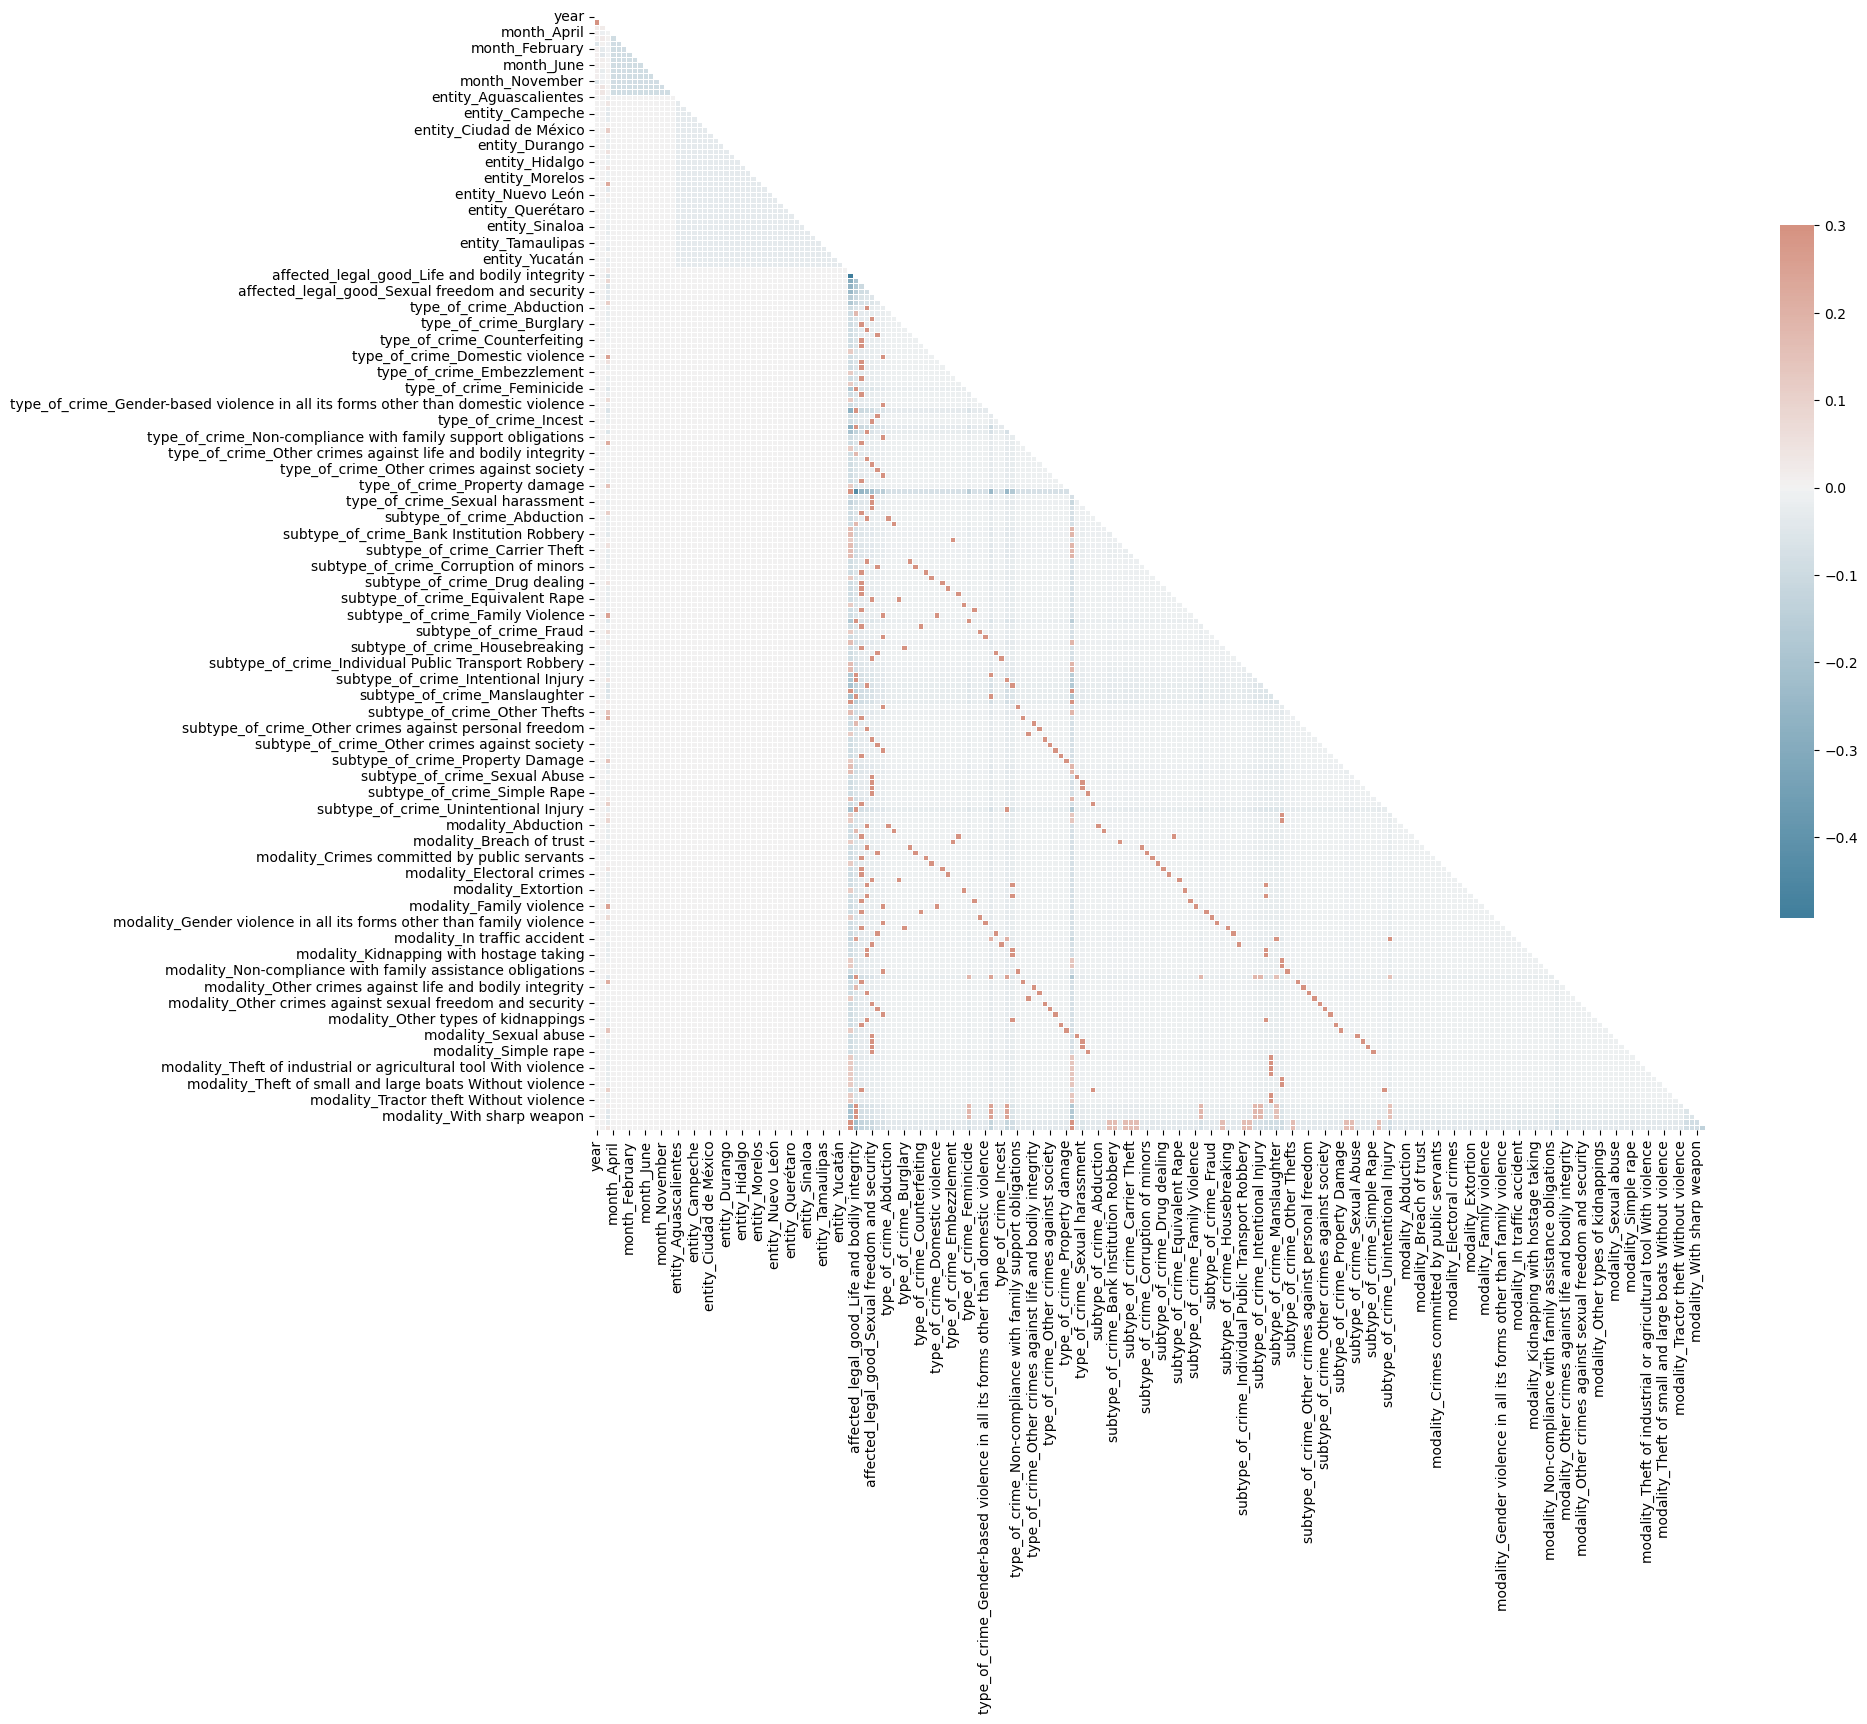

In [20]:
# Compute the correlation matrix
corr_encoded = df_encoded.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_encoded) # Create an array of zeros with the same shape as the correlation matrix
mask[np.triu_indices_from(mask)] = True # Set the upper triangle of the array to True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_encoded, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

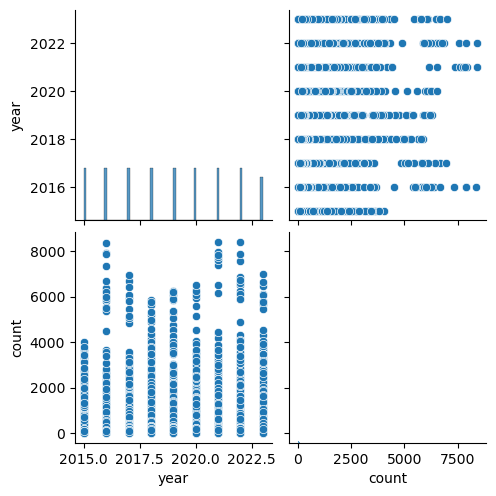

In [21]:
sns.pairplot(df)


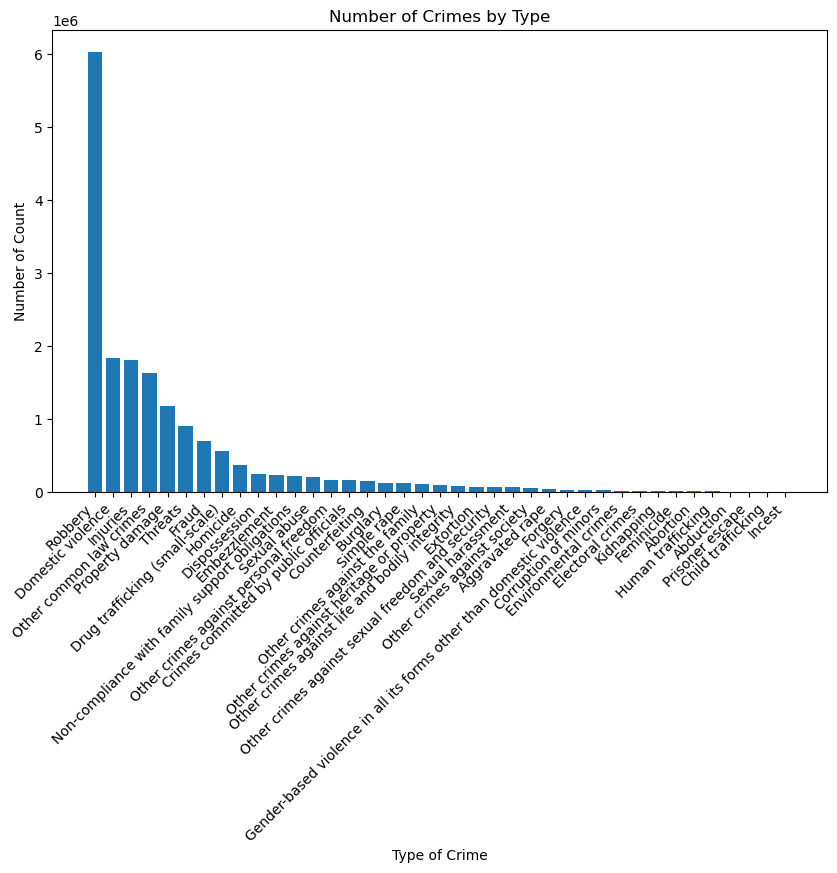

In [22]:
# Group the data by 'type_of_crime' and calculate the sum of 'count'
crime_type_sum = df.groupby('type_of_crime')['count'].sum()

# Sort the dataframe in ascending order by 'count'
df_sorted = crime_type_sum.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted.values)
plt.title('Number of Crimes by Type')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Count')

# Rotate x-axis values labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


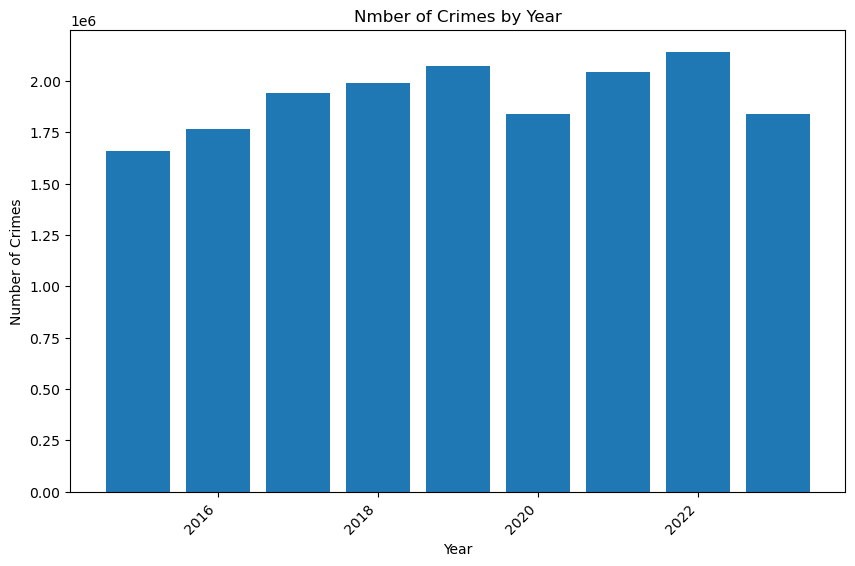

In [23]:
# Group the data by 'year' and calculate the sum of 'count'
yearly_sum = df.groupby('year')['count'].sum() # Group by 'year' and sum the 'count' column

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_sum.index, yearly_sum.values) # 'yearly_sum.index' is the x-axis and 'yearly_sum.values' is the y-axis
plt.title('Nmber of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')

plt.show()


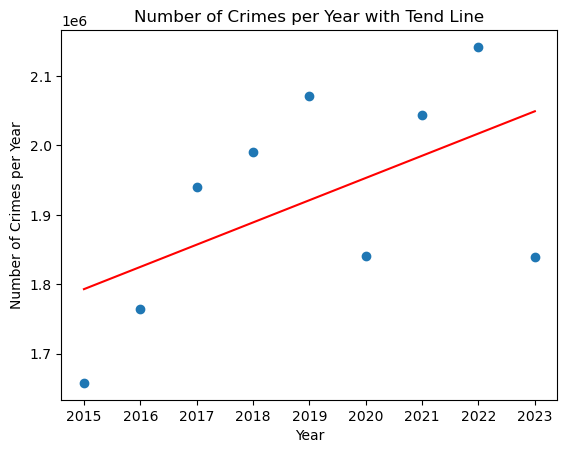

In [24]:
# Create a scatter plot
plt.scatter(df.groupby('year')['count'].sum().index, df.groupby('year')['count'].sum().values) 

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Crimes per Year')
plt.title('Number of Crimes per Year with Tend Line')

# Fit a polynomial regression line
x = df.groupby('year')['count'].sum().index # Year
y = df.groupby('year')['count'].sum().values # Crime rate per year. values is used to get the values of the groupby object
coefficients = np.polyfit(x, y, 1) # Fit a 1st degree polynomial
trendline = np.poly1d(coefficients) # Create a polynomial function
plt.plot(x, trendline(x), color='red') # Plot the trendline

# Show the plot
plt.show()

In [25]:
print("The trendline equation is: ", trendline)
print("The slope of the trendline is: ", coefficients[0])

The trendline equation is:   
3.204e+04 x - 6.278e+07
The slope of the trendline is:  32043.966666668046


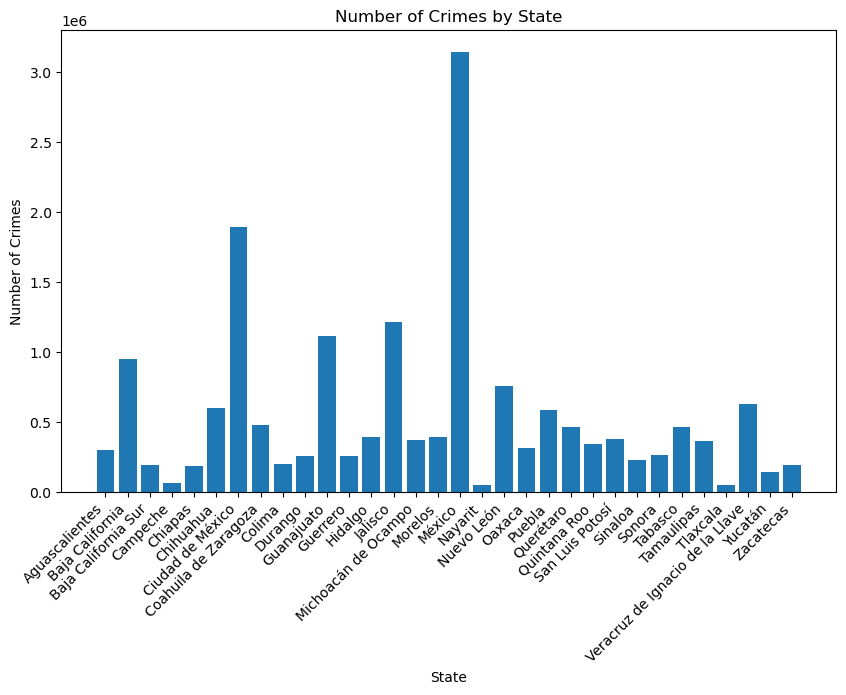

In [26]:
entity_sum = df.groupby('entity')['count'].sum() # Group by 'year' and sum the 'count' column

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(entity_sum.index, entity_sum.values) # 'yearly_sum.index' is the x-axis and 'yearly_sum.values' is the y-axis
plt.title('Number of Crimes by State')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/92/m463x7l104n16tz26hdzf6hr0000gn/T/ipykernel_34062/296292621.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["crime_sum_month"] = df.groupby("month")["count"].transform("sum") # Sum of crimes by month


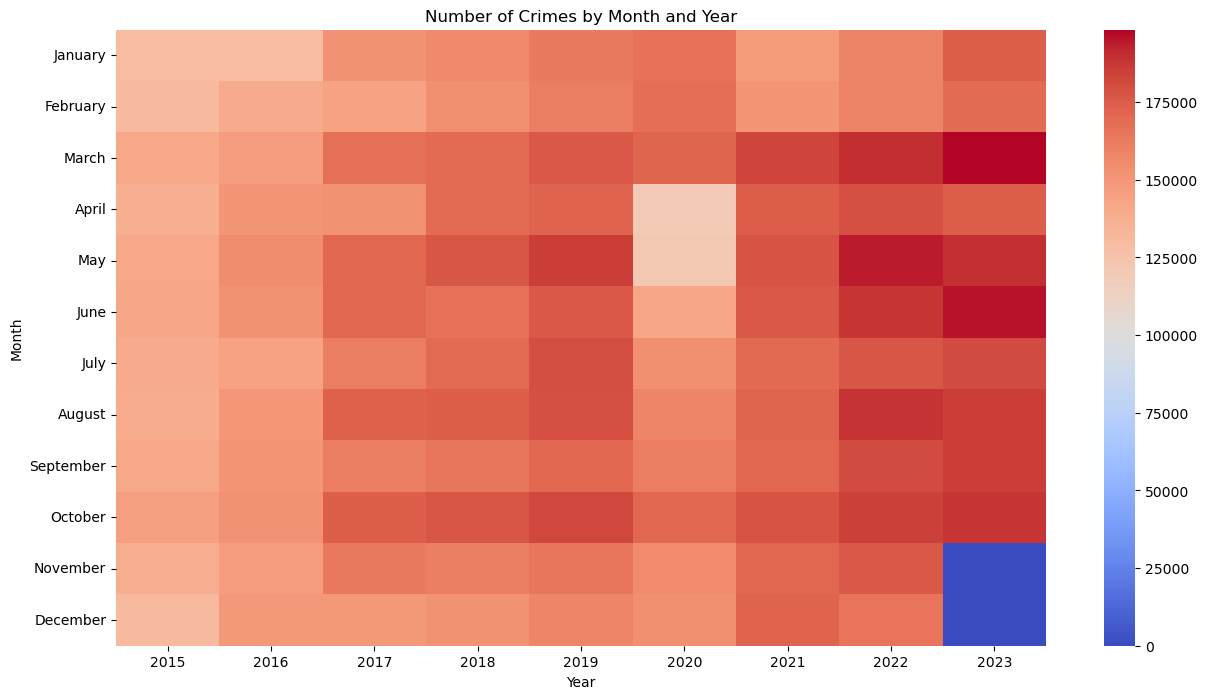

In [27]:
# Define the correct month order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'month' column to a categorical type with the correct order
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df["crime_sum_month"] = df.groupby("month")["count"].transform("sum") # Sum of crimes by month
pivot = df.pivot_table(values='count', index='month', columns='year', aggfunc='sum')

pivot = pivot.sort_index(ascending=True) # Sort the index in descending order (January to December

plt.figure(figsize=(15, 8))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Number of Crimes by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

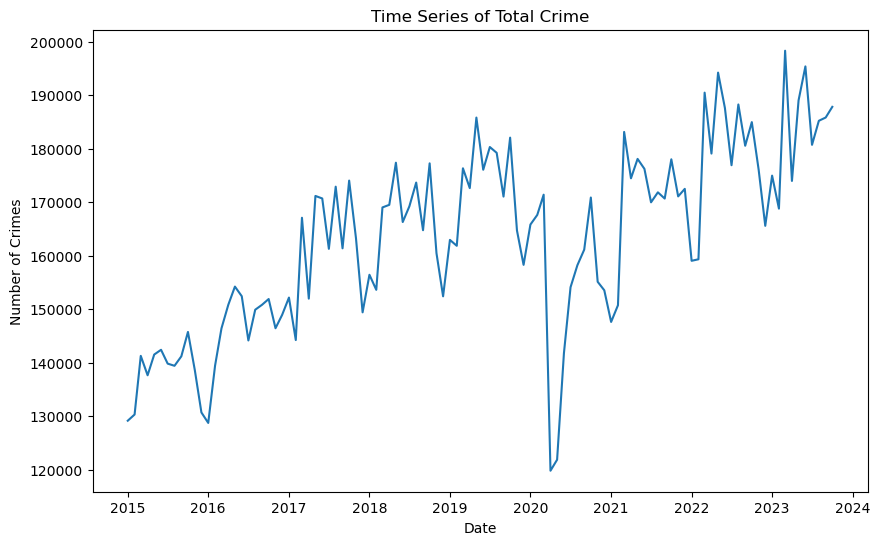

In [28]:
# Group the data by 'year_month' and calculate the sum of 'count'
crime_sum = df.groupby('year_month')['count'].sum()

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(crime_sum.index, crime_sum.values)
plt.title('Time Series of Total Crime')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


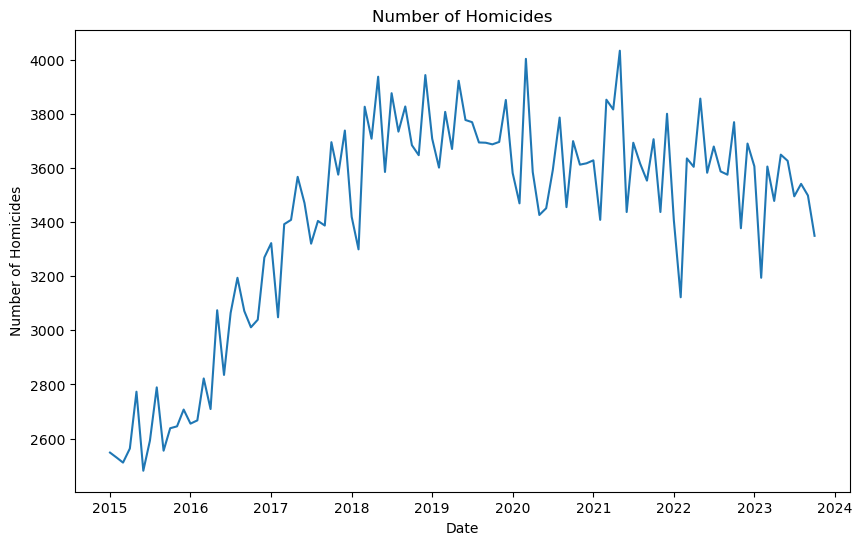

In [29]:
# Filter the dataframe for Homicide counts
homicide_sum = df[df['type_of_crime'] == 'Homicide'].groupby('year_month')['count'].sum()

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(homicide_sum.index, homicide_sum.values)
plt.title('Number of Homicides')
plt.xlabel('Date')
plt.ylabel('Number of Homicides')
plt.show()

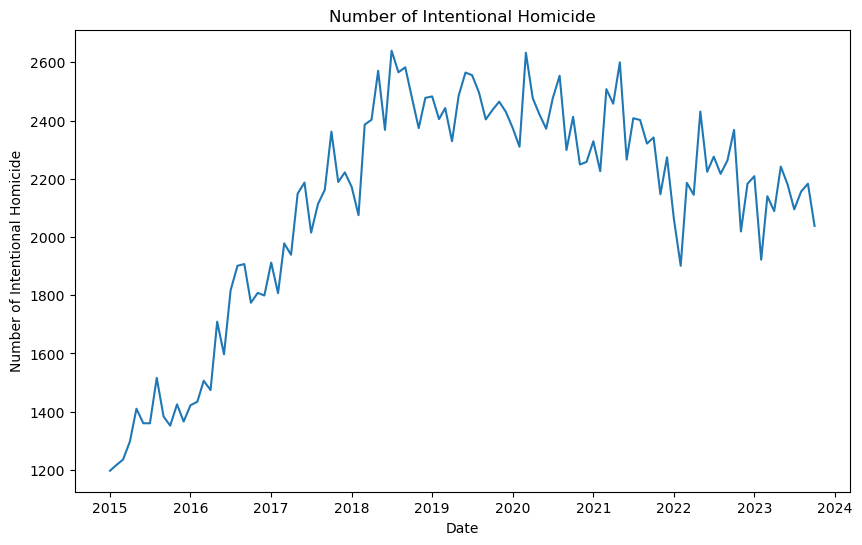

In [30]:
# Filter the dataframe for Homicide counts
homicide_int_sum = df[df['subtype_of_crime'] == 'Intentional Homicide'].groupby('year_month')['count'].sum()

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(homicide_int_sum.index, homicide_int_sum.values)
plt.title('Number of Intentional Homicide')
plt.xlabel('Date')
plt.ylabel('Number of Intentional Homicide')
plt.show()

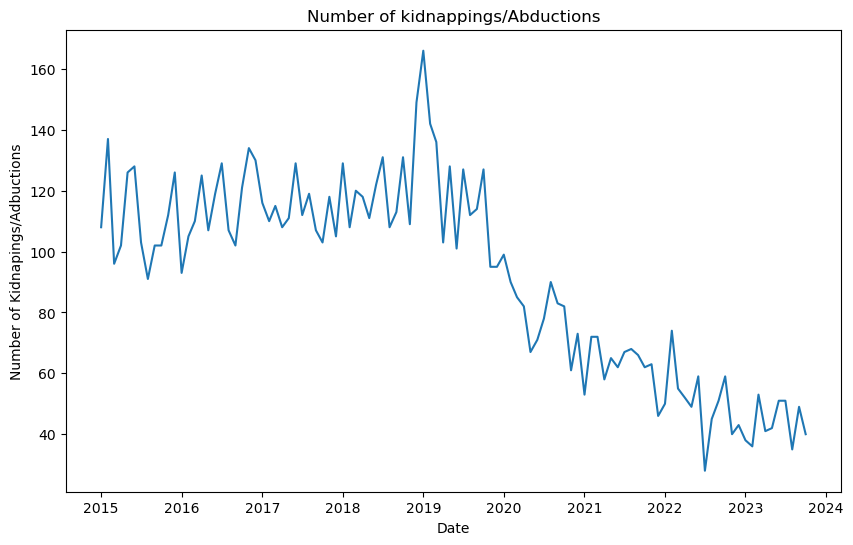

In [31]:
# Filter the dataframe for Kidnapping and Abduction counts
homicide_sum = df[(df['type_of_crime'] == 'Kidnapping') | (df['type_of_crime'] == 'Abduction')].groupby('year_month')['count'].sum() #Kidnapping and Abduction can be grouped together

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(homicide_sum.index, homicide_sum.values)
plt.title('Number of kidnappings/Abductions')
plt.xlabel('Date')
plt.ylabel('Number of Kidnapings/Adbuctions')
plt.show()

In [32]:
import folium
import json

In [33]:
# Read in JSON file for Mexico states
mexico_states = '/Users/patrickjones/Desktop/VCU Data Science and AI/Mini Projects/Mini Project One/New Data/states.geojson'

In [34]:
# Create a map centered at Mexico. GPS coordinates are general coordinates for Mexico.
map = folium.Map(location=[23.6345, -102.5528], zoom_start=5)
map

In [35]:
#  Examination of the JSON file showed the name of each state is uner the 'state_name' key.
# Rename 'entity' column in the DataFrame should be renamed to 'state_name'.
df = df.rename(columns={'entity': 'state_name'})
df.head()


,month,year,year_month,state_name,affected_legal_good,type_of_crime,subtype_of_crime,modality,count,crime_sum_month
0,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,3,1376844
1,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,1,1376844
2,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,0,1376844
3,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,2,1376844
4,January,2015,2015-01-01,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,0,1376844


In [36]:
# Group the data by 'state_name' and calculate the sum of 'count'
summary_state_year = df.groupby(['state_name', 'year'])['count'].sum().reset_index()
summary_state_year


,state_name,year,count
0,Aguascalientes,2015,23212
1,Aguascalientes,2016,23729
2,Aguascalientes,2017,33548
3,Aguascalientes,2018,38834
4,Aguascalientes,2019,38429
...,...,...,...
283,Zacatecas,2019,23952
284,Zacatecas,2020,22742
285,Zacatecas,2021,25110
286,Zacatecas,2022,25546


In [37]:
# Calculate the sum of 'count' for each state in 2015
summary_2015 = df[df['year'] == 2015].groupby('state_name')['count'].sum().reset_index()
summary_2015.head()

,state_name,count
0,Aguascalientes,23212
1,Baja California,119944
2,Baja California Sur,21415
3,Campeche,1886
4,Chiapas,21618


In [38]:
print("Total Number of crimes in 2015: ", summary_2015['count'].sum())

Total Number of crimes in 2015:  1657804


In [39]:
import folium

# Create a map centered around a specific location (e.g., Mexico)
m_2015 = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Create a choropleth map with a different color scale and range
folium.Choropleth(
    geo_data=mexico_states,  # the geojson file
    name='choropleth',
    data=summary_2015,  # your DataFrame
    columns=['state_name', 'count'],  # the columns in your DataFrame
    key_on='feature.properties.state_name',  # the correct key path to access 'state_name' in the geojson file
    fill_color= 'Reds',  # change the color scale to 'BuPu'
    fill_opacity=1.0,
    line_opacity=0.8,
    legend_name='Number of Crimes in Mexico by State in 2015',
    bins=30,  # number of bins
).add_to(m_2015)

# Display the map
m_2015

In [40]:
# Calculate the sum of 'count' for each state in 2022
summary_2022 = df[df['year'] == 2022].groupby('state_name')['count'].sum().reset_index()
summary_2022.head()

,state_name,count
0,Aguascalientes,39570
1,Baja California,109729
2,Baja California Sur,20486
3,Campeche,25536
4,Chiapas,16002


In [41]:
# Calculate the total number of crimes in 2022
print("Total Number of crimes in 2022: ", summary_2022['count'].sum())


Total Number of crimes in 2022:  2141979


In [42]:
# Create a map centered around a specific location (e.g., Mexico)
m_2022 = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Create a choropleth map
folium.Choropleth(
    geo_data=mexico_states,  # the geojson file
    name='choropleth',
    data=summary_2022,  # your DataFrame
    columns=['state_name', 'count'],  # the columns in your DataFrame
    key_on='feature.properties.state_name',  # the correct key path to access 'state_name' in the geojson file
    fill_color='Reds',
    fill_opacity=1.0,
    line_opacity=1.0,
    bins = 30,
    legend_name='Number of Crimes in Mexico by State in 2015'
).add_to(m_2022)

# Display the map
m_2022